# Experiment - 5 (KNNs)

Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of K Nearest Neighbours

Aim:  To apply the K-Nearest Neighbours algorithm on a given dataset for classification.

---

Problem statement:

- To use the given dataset to demonstrate classification using the K-Nearest Neighbours (KNN) algorithm.

Objective:

- To understand the working of the KNN algorithm

- To classify data points based on distance metrics

- To analyze the effect of different values of K

---


## Iris

### Setup

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names )
df['target'] = iris.target  # Add target classes.
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])   # Name the classes
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df['flower_names'].value_counts()

,count
flower_names,
setosa,50
versicolor,50
virginica,50


#### Visualizing **Plots**

In [ ]:
# Splitting the datasets into their respective targets.
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [ ]:
import matplotlib.pyplot as plt

##### Sepal Length vs Sepal Width

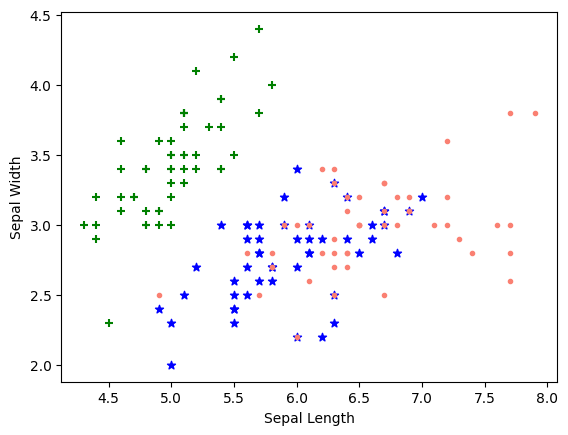

In [ ]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='salmon', marker='.')
plt.show()


##### Petal Length vs Petal Width

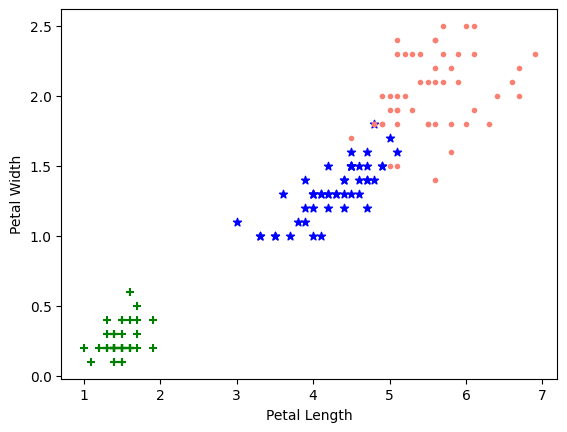

In [ ]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='salmon', marker='.')
plt.show()

### Training The Model


#### Train Test Splitting and Normalization


In [ ]:
from sklearn.model_selection import train_test_split

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#### Training KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def KNNx(a, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=a)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = knn.score(x_test, y_test)
    return y_pred, acc

y_pred, accuracy = KNNx(5, x_train, y_train, x_test, y_test)
CM = confusion_matrix(y_test, y_pred)

accuracy

1.0

##### Plotting Confusion Matrix Heatmap

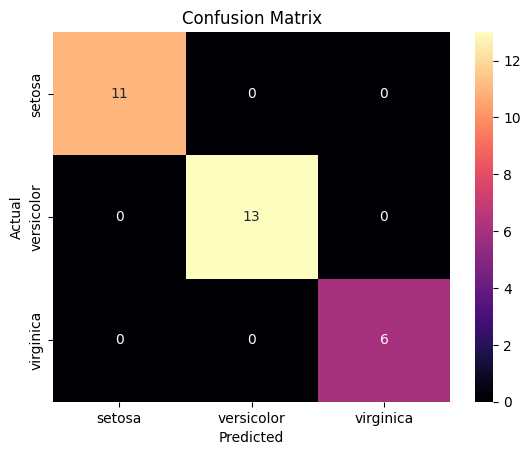

In [ ]:
import seaborn as sns

plt.figure()
sns.heatmap(
    CM,
    annot=True,
    cmap = 'magma',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Abalone Dataset

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
abalone = fetch_ucirepo(id=1)

X = pd.DataFrame(abalone.data.features)
y = pd.DataFrame(abalone.data.targets)

X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

display(X.describe(), y.describe())

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [ ]:
abalone.data.targets

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def knn_regression_predict(X_train, X_test, y_train, y_test, k=5):
    knn = KNeighborsRegressor(
        n_neighbors=k,
        weights='distance',
        metric='euclidean'
    )

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, rmse, mae, r2

y_pred, rmse, mae, r2 = knn_regression_predict(X_train, X_test, y_train, y_test, k=9)
display(rmse,mae,r2)

np.float64(2.2146717149960633)

1.5219076797536286

0.5469121814207738